# ADS 509 Assignment 2.1: Tokenization, Normalization, Descriptive Statistics 

This notebook holds Assignment 2.1 for Module 2 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In the previous assignment you pulled lyrics data on two artists. In this assignment we explore this data set and a pull from the now-defunct Twitter API for the artists Cher and Robyn.  If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Canvas. 

This assignment asks you to write a short function to calculate some descriptive statistics on a piece of text. Then you are asked to find some interesting and unique statistics on your corpora. 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [1]:
# !pip isntall emoji

In [2]:
import os
import re
import emoji
import pandas as pd
import numpy as np

from collections import Counter, defaultdict
from string import punctuation

In [31]:
# Add any additional import statements you need here
from collections import Counter
import json
import re 
import string

import matplotlib.pyplot as plt

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

sw = stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/samantharivas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# change `data_location` to the location of the folder on your machine.
data_location = "/Users/samantharivas/Documents/UNIVERSITY OF SAN DIEGO/ADS509/tokenization-normalization-and-descriptivestatistics"

# These subfolders should still work if you correctly stored the 
# data from the Module 1 assignment
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

In [5]:
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity (https://en.wikipedia.org/wiki/Lexical_diversity), 
        and num_tokens most common tokens. Return a list with the number of tokens, number
        of unique tokens, lexical diversity, and number of characters. 
    
    """

    # Fill in the correct values here. 
    num_tokens = len(tokens)
    num_unique_tokens = len(set(tokens))
    num_characters = sum(len(token) for token in tokens)
    lexical_diversity = num_unique_tokens / num_tokens if num_tokens > 0 else 0

    # find the most common token 
    token_counts = Counter(tokens)
    most_common_tokens = token_counts.most_common(num_tokens)
    
    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
    
        # print the five most common tokens
        print(f"The {num_tokens} most common tokens are:")
        for token, count in most_common_tokens:
            print(f"'{token}':{count}")
                  
    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])

In [6]:
text = """here is some example text with other example text here in this text""".split()
assert(descriptive_stats(text, verbose=True)[0] == 13)
assert(descriptive_stats(text, verbose=False)[1] == 9)
assert(abs(descriptive_stats(text, verbose=False)[2] - 0.69) < 0.02)
assert(descriptive_stats(text, verbose=False)[3] == 55)

There are 13 tokens in the data.
There are 9 unique tokens in the data.
There are 55 characters in the data.
The lexical diversity is 0.692 in the data.
The 13 most common tokens are:
'text':3
'here':2
'example':2
'is':1
'some':1
'with':1
'other':1
'in':1
'this':1


Q: Why is it beneficial to use assertion statements in your code? 

A: Assertions are valuable tools because they ensure the correctness of the code, improve code quality, and aid in debugging. They help catch errors early by verifying that certain conditions hold true during execution. This error detection makes the codebase reliable. Assertions serve as a form of documentation, making the code easier to understand for other developers and enhancing code robustness.

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




In [7]:
# Read in the lyrics data

# define path location for lyrics 
lyrics_location = "/Users/samantharivas/Documents/UNIVERSITY OF SAN DIEGO/ADS509/tokenization-normalization-and-descriptivestatistics/M1 Results/lyrics"

# read in the lyrics data 
lyrics_data = {}
for artist in os.listdir(lyrics_location):
    artist_folder = os.path.join(lyrics_location, artist)
    if os.path.isdir(artist_folder):  # Check if it's a directory
        lyrics_data[artist] = {}
        for song_file in os.listdir(artist_folder):
            song_path = os.path.join(artist_folder, song_file)
            if os.path.isfile(song_path):  # Check if it's a file
                with open(song_path, 'r', encoding='utf-8') as file:
                    lyrics_data[artist][song_file] = file.read()

print(lyrics_data)

{'robyn': {'robyn_includemeout.txt': '"Include Me Out"\n\n\n\nIt is really very simple\nJust a single pulse, repeated at a regular interval\n\nMmm, hmm\nDon\'t include me out, no\nDon\'t include me out\n\nOne time for the records and the hits\nTwo for your money-maker, shake, boom\nThree times for the lucky and the dead\n\nOne time for the sorry and safe\nTwo for the beggar and his company\nThree times for the sinner and the saint\n\nYeah, bow down all you wicked and the vain\nBow to the miracle, the em, na, na\nThree times and the devil will be gone\n\nOne time for the fire, bring it on\nTwo for the boogie, gotta bang the beat\nThree times for the ladies, show me some love\n\nTalking \'bout everyone, every day, all day\n\nAnd if your world should fall apart\nThere\'s plenty room inside my heart\nJust don\'t include me out\nDon\'t include me out\n\nAnd if your world should fall apart\nI still got room inside my heart\nJust don\'t include me out\nDon\'t include me out, d-d-don\'t includ

In [8]:
# Read in the twitter data
import json
from json.decoder import JSONDecodeError

# define path location for twitter
twitter_location = "/Users/samantharivas/Documents/UNIVERSITY OF SAN DIEGO/ADS509/tokenization-normalization-and-descriptivestatistics/M1 Results/twitter"

# read in the twitter data 

# initialize variables to count the number of artists and descriptions
num_artists = 0
total_descriptions = 0

# iterate over the files in the Twitter directory
for filename in os.listdir(twitter_location):
    filepath = os.path.join(twitter_location, filename)
    
    # check if file is txt file
    if filename.endswith(".txt"):
        # open file
        with open(filepath, "r", encoding="utf-8") as file: 
            # read entire contents of file
            file_contents = file.read()
            # count number of descriptions
            num_descriptions = file_contents.count('\n')
            # increment total number of descriptions
            total_descriptions += num_descriptions
            # increment number of artists
            num_artists += 1

# print the summary
print("Number of artists:", num_artists)
print("Total number of descriptions:", total_descriptions)

Number of artists: 4
Total number of descriptions: 8706875


## Data Cleaning

Now clean and tokenize your data. Remove punctuation chacters (available in the `punctuation` object in the `string` library), split on whitespace, fold to lowercase, and remove stopwords. Store your cleaned data, which must be accessible as an interable for `descriptive_stats`, in new objects or in new columns in your data frame. 



In [9]:
punctuation = set(punctuation) # speeds up comparison
sw = set(stopwords.words('english')) # set stopword

In [10]:
# clean and tokenize data 
def clean_tokenize_text(text):
    # Remove punctuation characters
    text = text.translate(str.maketrans("", "", string.punctuation))
    # Split the text on whitespace and convert to lowercase
    tokens = text.lower().split()
    # Remove stopwords
    tokens = [token for token in tokens if token not in sw]
    return tokens

In [11]:
# create your clean twitter data here
clean_twitter_data = {}

# iterate over files in the Twitter directory
for filename in os.listdir(twitter_location):
    filepath = os.path.join(twitter_location, filename)
    
    # check if file is a text file
    if filename.endswith(".txt"):
        #initalize a list to store artist descriptions 
        artist_descriptions = []
        
        # open file
        with open(filepath, "r", encoding="utf-8") as file:
            lines = file.readlines()
            
            # process each line
            for line in lines:
                # clean/toeknizetext
                tokens = clean_tokenize_text(line)
                artist_descriptions.append(tokens)
        
        # store cleaned and tokenized descriptions for artist
        clean_twitter_data[filename] = artist_descriptions

# print cleaned data
for artist, descriptions in clean_twitter_data.items():
    print("Artist:", artist)
    for i, description in enumerate(descriptions[:3], 1):
        print("Description", i, ":", description)

Artist: cher_followers_data.txt
Description 1 : ['screenname', 'name', 'id', 'location', 'followerscount', 'friendscount', 'description']
Description 2 : ['hsmcnp', 'country', 'girl', '35152213', '1302', '1014']
Description 3 : ['horrormomy', 'jeny', '742153090850164742', 'earth', '81', '514', '𝙿𝚛𝚘𝚞𝚍', '𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛', '𝚘𝚏', '𝚖𝚎𝚜𝚜𝚢', '𝚋𝚞𝚗𝚜', '𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜']
Artist: robynkonichiwa_followers_data.txt
Description 1 : ['screenname', 'name', 'id', 'location', 'followerscount', 'friendscount', 'description']
Description 2 : ['angelxoarts', 'angelxo', '1424055675030806529', 'zacatlan', 'puebla', 'mexico', '29', '535', 'love', 'chill', '•facebook', 'instagram', 'soundcloud', 'angelxoarts•', 'httpstco447okklkza…']
Description 3 : ['songsfornikola', 'johnny', '1502717352575651840', '6', '318', 'books', 'movies', 'music', 'nature', 'tv', 'shows', 'og', 'sweetee', 'since', '12', 'thanks', 'youtube', 'recommending', 'feeling', 'homepage', '♥️']
Artist: cher_followers.txt
Description 1 : ['id']
Description 

In [14]:
# create your clean lyrics data here
clean_lyrics_data = {}
for artist, songs in lyrics_data.items():
    clean_lyrics_data[artist] = {}
    for song_title, lyrics in songs.items():
        clean_lyrics_data[artist][song_title] = clean_tokenize_text(lyrics)
        
# iterate over each artist and their songs
for artist, songs in clean_lyrics_data.items():
    print(f"Artist: {artist}")
    # iterate over each song and its tokenized lyrics
    for song_title, tokenized_lyrics in songs.items():
        print(f"Song Title: {song_title}")
        print("Snippet of tokenized lyrics:")
        print(tokenized_lyrics[:10])  
        print() 

Artist: robyn
Song Title: robyn_includemeout.txt
Snippet of tokenized lyrics:
['include', 'really', 'simple', 'single', 'pulse', 'repeated', 'regular', 'interval', 'mmm', 'hmm']

Song Title: robyn_electric.txt
Snippet of tokenized lyrics:
['electric', 'electric', 'electric', 'natural', 'high', 'electric', 'dont', 'always', 'know', 'electric']

Song Title: robyn_beach2k20.txt
Snippet of tokenized lyrics:
['beach', '2k20', 'wanna', 'go', 'gonna', 'get', 'ok', 'call', 'someone', 'alright']

Song Title: robyn_lovekills.txt
Snippet of tokenized lyrics:
['love', 'kills', 'youre', 'looking', 'love', 'get', 'heart', 'made', 'steel', 'cus']

Song Title: robyn_timemachine.txt
Snippet of tokenized lyrics:
['time', 'machine', 'hey', 'cant', 'believe', 'fit', 'threw', 'stupid', 'wanted', 'reaction']

Song Title: robyn_lovekills114524.txt
Snippet of tokenized lyrics:
['love', 'kills', 'youre', 'looking', 'love', 'get', 'heart', 'made', 'steel', 'cus']

Song Title: robyn_givingyouback.txt
Snippet of 

## Basic Descriptive Statistics

Call your `descriptive_stats` function on both your lyrics data and your twitter data and for both artists (four total calls). 

In [15]:
# calls to descriptive_stats here

# descriptive stats for clean lyrics for each artist 
for artist, songs in clean_lyrics_data.items():
    print(f"Descriptive stats for {artist} (Lyrics data):")
    descriptive_stats(songs)
    
# descriptive stats for twitter data of each artist 
for artist, descriptions in clean_twitter_data.items():
    print(f"Descriptive stats for {artist} (Twitter data):")
    descriptive_stats(descriptions)

Descriptive stats for robyn (Lyrics data):
There are 104 tokens in the data.
There are 104 unique tokens in the data.
There are 2410 characters in the data.
The lexical diversity is 1.000 in the data.
The 104 most common tokens are:
'robyn_youvegotthatsomething.txt':['youve', 'got', 'something', 'look', 'im', 'givin', 'lovin', 'every', 'day', 'life', 'see', 'show', 'love', 'one', 'little', 'hint', 'know', 'give', 'much', 'much', 'sacrifice', 'ive', 'got', 'reasons', 'look', 'eyes', 'know', 'love', 'even', 'though', 'shouldnt', 'know', 'ive', 'tried', 'stop', 'youve', 'got', 'somethin', 'gives', 'feelin', 'gives', 'freaky', 'vibe', 'youve', 'got', 'something', 'makes', 'feel', 'fine', 'makes', 'worth', 'waiting', 'day', 'mine', 'mine', 'decide', 'take', 'time', 'want', 'know', 'ill', 'always', 'friends', 'keep', 'tellin', 'youve', 'gotta', 'let', 'go', 'say', 'im', 'good', 'maybe', 'true', 'keep', 'lovin', 'way', 'know', 'ive', 'tried', 'stop']
'robyn_iwish.txt':['wish', 'know', 'think'

TypeError: unhashable type: 'list'

Q: How do you think the "top 5 words" would be different if we left stopwords in the data? 

A: Leaving stopwords would result in a different set of top 5 words, including common words such as 'the', 'of, 'is', 'and'. These common words do not carry semantic meaning and leaving them can result in skewed words by highlighting common words instead of meaningful ones. 

---

Q: What were your prior beliefs about the lexical diversity between the artists? Does the difference (or lack thereof) in lexical diversity between the artists conform to your prior beliefs? 

A: Prior beliefs about lexical diversity between artists can vary based on factors such as audience demographics, genre, and lyrical style. Artists may adjust their word choice depending on their audience, leading to differences in lexical diversity. Genres can influence narrative complexity, with some genres favoring intricate narratives while others prefer simplicity. This same influence is applied to lyrical style, where certain genres may encourage more elaborate or straightforward expressions. It suggests that artists tailor their linguistic choices to align with the expectations and preferences of their target audience. 


## Specialty Statistics

The descriptive statistics we have calculated are quite generic. You will now calculate a handful of statistics tailored to these data.

1. Ten most common emojis by artist in the twitter descriptions.
1. Ten most common hashtags by artist in the twitter descriptions.
1. Five most common words in song titles by artist. 
1. For each artist, a histogram of song lengths (in terms of number of tokens) 

We can use the `emoji` library to help us identify emojis and you have been given a function to help you.


In [16]:
assert(emoji.is_emoji("❤️"))
assert(not emoji.is_emoji(":-)"))

### Emojis 😁

What are the ten most common emojis by artist in the twitter descriptions? 


In [19]:
# initialize dictionary to store emojis by artists
emojis_by_artist = {}

# iterate over twitter data
for filename in os.listdir(twitter_location):
    if filename.endswith(".txt"):
        artist = filename[:-4]
        file_path = os.path.join(twitter_location, filename)
        
        # initialize counter object for emojis
        emoji_counter = Counter()
        
        with open(file_path, "r", encoding="utf-8") as file:
            for line in file:
                for char in line:
                    if char in emoji.UNICODE_EMOJI['en']:
                        emoji_counter.update(char)
        
        # store the top 10 emojis for artist
        emojis_by_artist[artist] = emoji_counter.most_common(10)

# print ten most common emojis by artist
for artist, emojis in emojis_by_artist.items():
    print(f"Top ten emojis for {artist}:")
    if not emojis:
        print("No emojis found.")
    else:
        for emoji_char, count in emojis:
            print(f"{emoji_char} - {count} occurrences")
    print()

Top ten emojis for cher_followers_data:
❤ - 94506 occurrences
🌈 - 66291 occurrences
♥ - 48059 occurrences
🏳 - 47174 occurrences
✨ - 45846 occurrences
🌊 - 31234 occurrences
💙 - 31050 occurrences
🏻 - 25195 occurrences
✌ - 21963 occurrences
💜 - 21571 occurrences

Top ten emojis for robynkonichiwa_followers_data:
🌈 - 6086 occurrences
❤ - 5635 occurrences
🏳 - 4641 occurrences
♥ - 4249 occurrences
✨ - 3217 occurrences
🏻 - 1751 occurrences
✌ - 1495 occurrences
♀ - 1347 occurrences
🏼 - 1340 occurrences
💙 - 1200 occurrences

Top ten emojis for cher_followers:
No emojis found.

Top ten emojis for robynkonichiwa_followers:
No emojis found.



### Hashtags

What are the ten most common hashtags by artist in the twitter descriptions? 


In [22]:
# initialize dictionary to store hashtags by artists
hashtags_by_artist = {}

# iterate over twitter data
for filename in os.listdir(twitter_location):
    if filename.endswith(".txt"):
        artist = filename[:-4]
        file_path = os.path.join(twitter_location, filename)
        
        with open(file_path, "r", encoding="utf-8") as file:
            hashtags_by_artist[artist]= [line.strip() for line in file]

# function to extract hashtags from a text
def extract_hashtags(text):
    return re.findall(r"#(\w+)", text)

# dictionary to store hashtags for each artist
artist_hashtags = {
    artist: [
        hashtag for description in descriptions for hashtag in extract_hashtags(
            description)]
    for artist, descriptions in hashtags_by_artist.items()
}

# dictionary to store top ten hashtags for each artist
top_ten_hashtags_by_artist = {
    artist: Counter(hashtags).most_common(10) 
    for artist, hashtags in artist_hashtags.items()}


for artist, top_hashtags in top_ten_hashtags_by_artist.items():
    print(f"Top ten hashtags for {artist}:")
    if not top_hashtags:
        print("No hashtags found.")
    else:
        for hashtag, count in top_hashtags:
            print(f"{hashtag}: {count}")
    print()          

Top ten hashtags for cher_followers_data:
BLM: 10100
Resist: 6161
BlackLivesMatter: 4888
resist: 3860
FBR: 3330
1: 3111
TheResistance: 3044
blacklivesmatter: 2738
Resistance: 1953
RESIST: 1878

Top ten hashtags for robynkonichiwa_followers_data:
BlackLivesMatter: 356
BLM: 345
1: 228
blacklivesmatter: 222
music: 175
Music: 114
EDM: 87
LGBTQ: 76
blm: 60
TeamFollowBack: 59

Top ten hashtags for cher_followers:
No hashtags found.

Top ten hashtags for robynkonichiwa_followers:
No hashtags found.



### Song Titles

What are the five most common words in song titles by artist? The song titles should be on the first line of the lyrics pages, so if you have kept the raw file contents around, you will not need to re-read the data.


In [27]:
# Your code here

# initialize dictionary to store song titles by artist
titles_by_artist = {}

# iterate over each lyrics directory for artists
for artist in os.listdir(lyrics_location):
    artist_folder = os.path.join(lyrics_location, artist)
    if os.path.isdir(artist_folder):  
        for song_file in os.listdir(artist_folder):
            song_path = os.path.join(artist_folder, song_file)
            if os.path.isfile(song_path):  
                with open(song_path, 'r', encoding='utf-8') as file:
                    title = file.readline().strip()
                    if title:  
                        if artist in titles_by_artist:
                            titles_by_artist[artist].append(title)
                        else:
                            titles_by_artist[artist] = [title]

# function to extract words from text
def extract_words(text):
    return re.findall(r'\b\w+\b', text.lower())

# dictionary to store word counts for each artist
words_by_artist = {
    artist: [word for title in titles for word in extract_words(title)]
    for artist, titles in titles_by_artist.items()
}

# dictionary to store top five words for each artist
top_five_words_by_artist = {
    artist: Counter(words).most_common(5) 
    for artist, words in words_by_artist.items()
}


for artist, top_words in top_five_words_by_artist.items():
    print(f"Top five words in song titles for {artist}:")
    if not top_words:
        print("No words found.")
    else:
        for word, count in top_words:
            print(f"{word}: {count}")
    print()

Top five words in song titles for robyn:
me: 11
you: 9
the: 8
my: 8
love: 6

Top five words in song titles for cher:
the: 54
you: 44
love: 38
i: 38
to: 28



### Song Lengths

For each artist, a histogram of song lengths (in terms of number of tokens). If you put the song lengths in a data frame with an artist column, matplotlib will make the plotting quite easy. An example is given to help you out. 


artist
Artist 1    AxesSubplot(0.125,0.11;0.775x0.77)
Artist 2    AxesSubplot(0.125,0.11;0.775x0.77)
Name: length, dtype: object

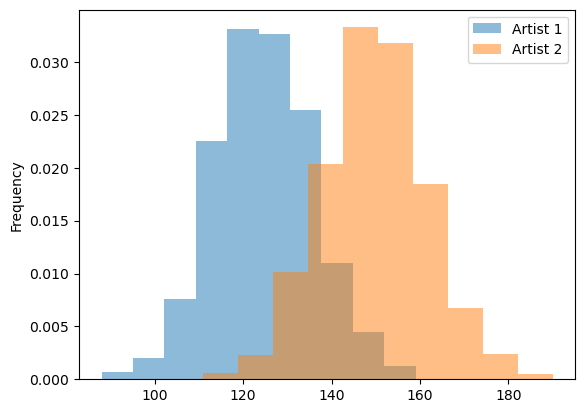

In [28]:
num_replicates = 1000

df = pd.DataFrame({
    "artist" : ['Artist 1'] * num_replicates + ['Artist 2']*num_replicates,
    "length" : np.concatenate((np.random.poisson(125,num_replicates),np.random.poisson(150,num_replicates)))
})

df.groupby('artist')['length'].plot(kind="hist",density=True,alpha=0.5,legend=True)

Since the lyrics may be stored with carriage returns or tabs, it may be useful to have a function that can collapse whitespace, using regular expressions, and be used for splitting. 

Q: What does the regular expression `'\s+'` match on? 

A: `'\s'` matches any whitespace characters such as spaces, tabs, and newline characters. `'+'` matches one or more occurrences of the preceding element. Therefore, the combined `'\s+'` will match one or more whitespace characters. 


In [29]:
collapse_whitespace = re.compile(r'\s+')

def tokenize_lyrics(lyric) : 
    """strip and split on whitespace"""
    return([item.lower() for item in collapse_whitespace.split(lyric)])

artist
cher     AxesSubplot(0.125,0.11;0.775x0.77)
robyn    AxesSubplot(0.125,0.11;0.775x0.77)
Name: length, dtype: object

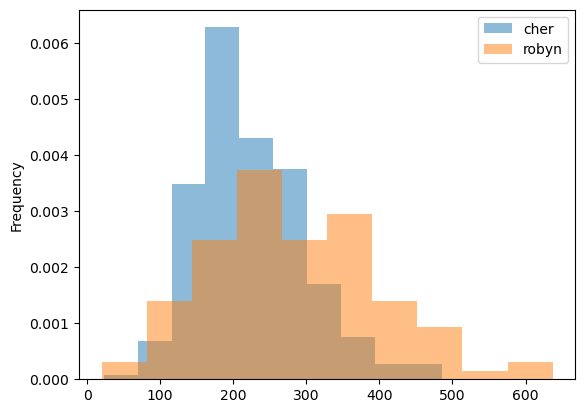

In [33]:
# Your lyric length comparison chart here.

# initialize lists to store song lengths and artists
song_lengths = []
artists = []

# iterate over directory (artist) in lyrics directory
for artist in os.listdir(lyrics_location):
    artist_folder = os.path.join(lyrics_location, artist)
    if os.path.isdir(artist_folder):  
        for song_file in os.listdir(artist_folder):
            song_path = os.path.join(artist_folder, song_file)
            if os.path.isfile(song_path):  
                with open(song_path, 'r', encoding='utf-8') as file:
                    lyrics = file.read()
                    tokens = tokenize_lyrics(lyrics)
                    song_lengths.append(len(tokens))
                    artists.append(artist)

# create df with song lengths and artists
df = pd.DataFrame({"artist": artists, "length": song_lengths})

# plot histogram 
df.groupby('artist')['length'].plot(kind="hist", density=True, alpha=0.5, legend=True)